# **Q5. Business Case: Delhivery - Feature Engineering**

## **Problem Statement:**
### 1. Clean, sanitize and manipulate data to get useful features out of raw fields.
### 2. Make sense out of the raw data and help the data science team to build forecasting models on it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
import pylab
import missingno as msno
pd.set_option('display.max_columns', None)
minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()
sns.set_theme(style="darkgrid")
continuous_types = ['int64', 'float64', 'datetime64[ns]']
numeric_types = ['int64', 'float64']
categorical_types = ['category']
get_columns_by_types = lambda df, types: [df.columns[index] for index in range(len(df.columns)) if df.dtypes[index].name in types]

***
***
## **1. Analyzing Basic Metrics.**

In [2]:
df = pd.read_csv('delhivery_data.txt')

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


***
### Updating Data Types.

In [4]:
for column in ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']:
    df[column] = pd.to_datetime(df[column])
for column in ['data', 'route_type']:
    df[column] = pd.Categorical(df[column])

In [5]:
print("Shape:", df.shape, "\n")

Shape: (144867, 24) 



In [6]:
df.dtypes

data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

***
***
## **2. Missing Values.**

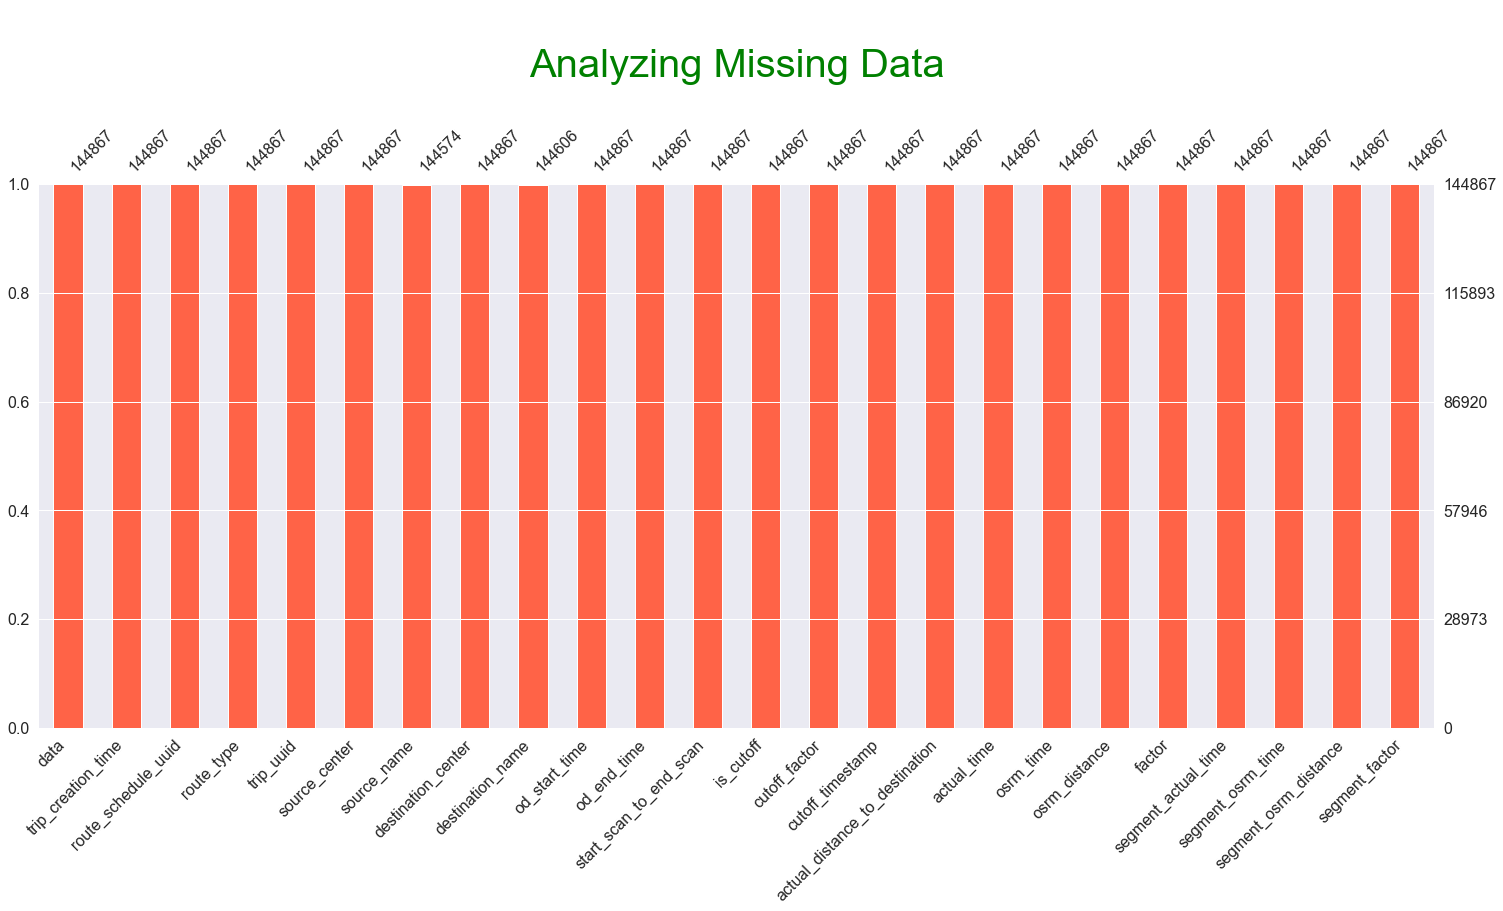

In [7]:
msno.bar(df, color='tomato')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

***
### Processing Nan values.

In [8]:
df['source_name'] = df['source_name'].replace(np.nan, 'Unknown')
df['destination_name'] = df['destination_name'].replace(np.nan, 'Unknown')

***
***
## **2. Merging Records.**

***
### Merging records on key ('trip_uuid', 'source_center', 'destination_center').

In [9]:
df = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(trip_creation_time=('trip_creation_time', 'max'),
                                                                    route_schedule_uuid=('route_schedule_uuid', 'last'),
                                                                    route_type=('route_type', 'last'),
                                                                    source_name=('source_name', 'last'),
                                                                    destination_name=('destination_name', 'last'),
                                                                    od_start_time=('od_start_time', 'max'),
                                                                    od_end_time=('od_end_time', 'max'),
                                                                    start_scan_to_end_scan=('start_scan_to_end_scan', 'max'),
                                                                    actual_distance_to_destination=('actual_distance_to_destination', 'max'),
                                                                    actual_time=('actual_time', 'max'),
                                                                    osrm_time=('osrm_time', 'max'),
                                                                    osrm_distance=('osrm_distance', 'max')).reset_index()

In [10]:
df.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109


***
### Merging records further on key ('trip_uuid').

In [11]:
df = df.groupby(['trip_uuid']).agg(source_center=('source_center', 'last'),
                                                                    destination_center=('destination_center', 'first'),
                                                                    trip_creation_time=('trip_creation_time', 'last'),
                                                                    route_schedule_uuid=('route_schedule_uuid', 'first'),
                                                                    route_type=('route_type', 'first'),
                                                                    source_name=('source_name', 'last'),
                                                                    destination_name=('destination_name', 'first'),
                                                                    od_start_time=('od_start_time', 'min'),
                                                                    od_end_time=('od_end_time', 'max'),
                                                                    start_scan_to_end_scan=('start_scan_to_end_scan', 'sum'),
                                                                    actual_distance_to_destination=('actual_distance_to_destination', 'sum'),
                                                                    actual_time=('actual_time', 'sum'),
                                                                    osrm_time=('osrm_time', 'sum'),
                                                                    osrm_distance=('osrm_distance', 'sum')).reset_index()

In [12]:
df.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748,IND462022AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,743.0,991.3523
1,trip-153671042288605164,IND572101AAA,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110
2,trip-153671043369099517,IND562132AAA,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1932.273969,3347.0,1741.0,2372.0852
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800
4,trip-153671052974046625,IND583201AAA,IND583201AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Hospet (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918


***
***
## **3. Outlier Detection & Treatment.**

In [13]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,530.810016,164.683253,357.143754,162.071202,205.101357
std,658.705957,305.561572,561.396157,272.304633,370.780010
min,23.000000,9.002461,9.000000,6.000000,9.072900
25%,149.000000,22.860030,67.000000,29.000000,30.941800
50%,280.000000,48.499937,149.000000,60.000000,65.882600
75%,637.000000,164.853324,370.000000,169.000000,209.300500
max,7898.000000,2187.483994,6265.000000,2032.000000,2840.081000


In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    outlier_fraction = (len(df_in)-len(df_out))/len(df_in)
    fig, axes = plt.subplots(1, 1, sharex=True, figsize=(18,6))
    sns.boxplot(data=df_in, y=col_name)
    if outlier_fraction <= 0.10:
        fig.suptitle(f"Outliers constitute {round(outlier_fraction*100, 2)}% of data for column '{col_name}'. Hence removing outliers.", fontsize=20, color="green")
        plt.show()
        return df_out
    else:
        fig.suptitle(f"Outliers constitute significant amount of data ({round(outlier_fraction*100, 2)}%) for column '{col_name}'. Hence not removing outliers..", fontsize=20, color="green")
        plt.show()
        return df_in

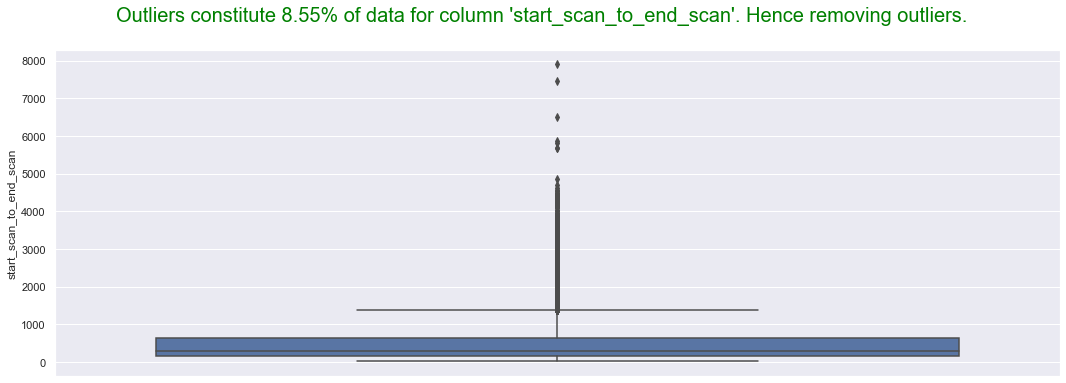

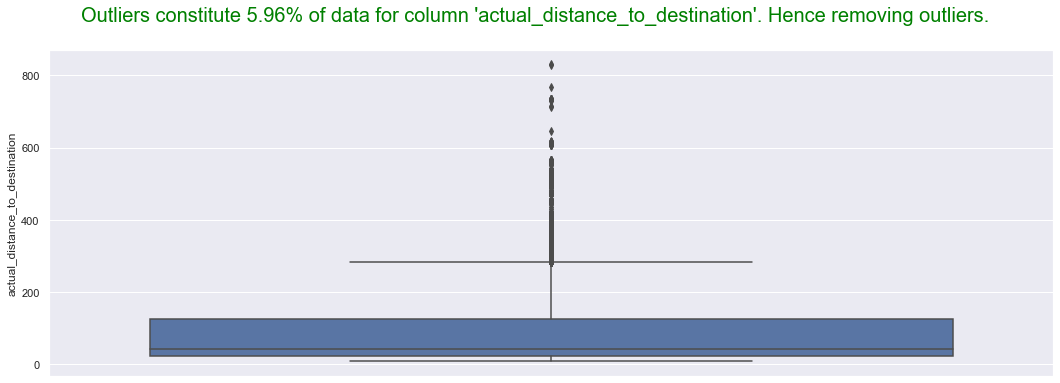

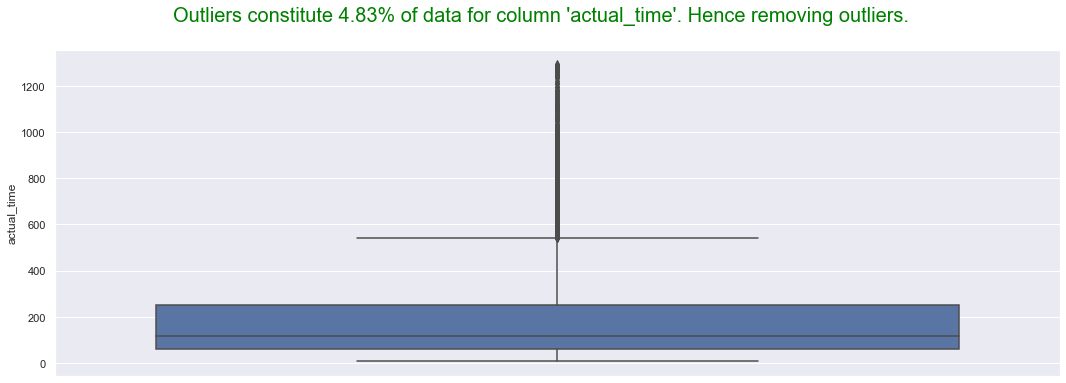

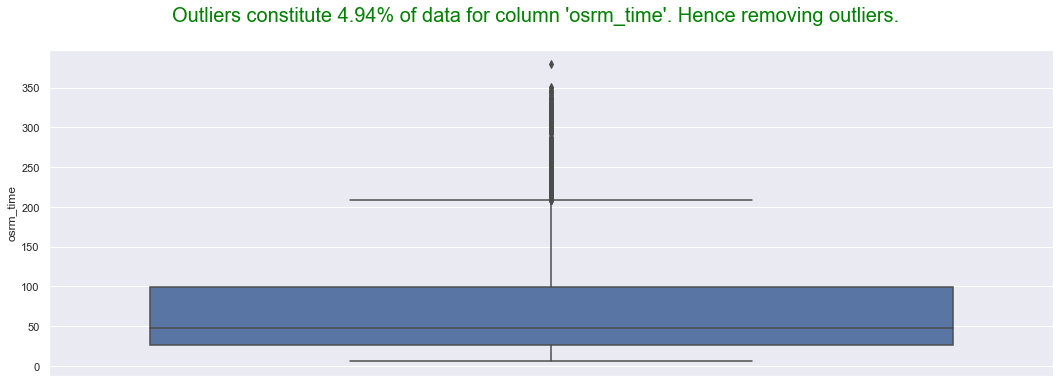

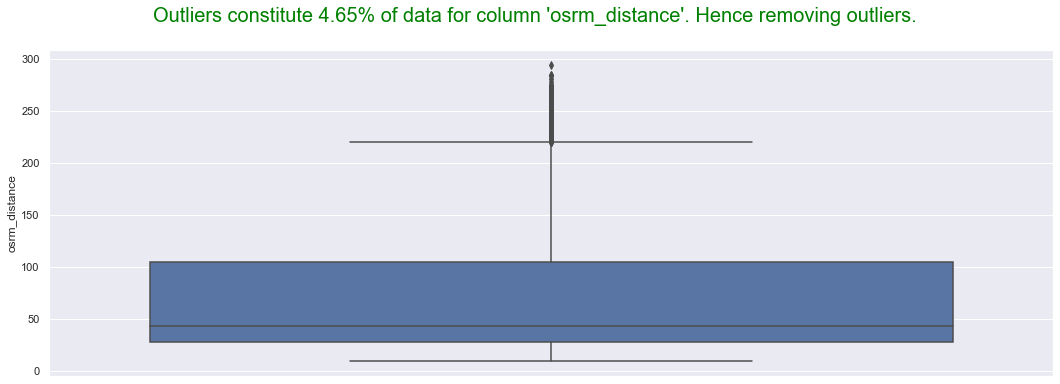

In [15]:
for column in get_columns_by_types(df, numeric_types):
    df = remove_outlier(df, column)

***
***
## **4. Univariate Analysis (Categorical Data).**

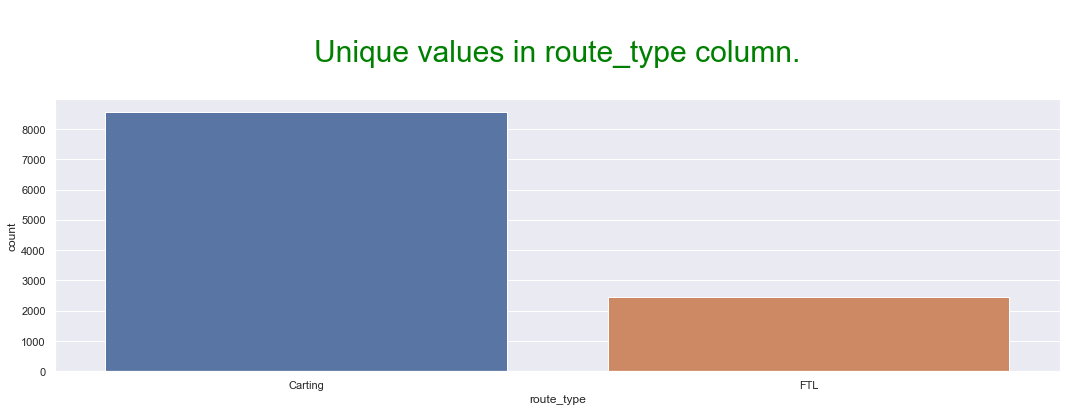

In [16]:
for column in get_columns_by_types(df, categorical_types):
    fig, axes = plt.subplots(figsize=(18,5))
    sns.countplot(data=df, x=column)
    plt.title(f"\nUnique values in {column} column.\n", fontsize=30, color="green")
    plt.show()

***
***
## **5. Univariate Analysis (Continuous Data).**

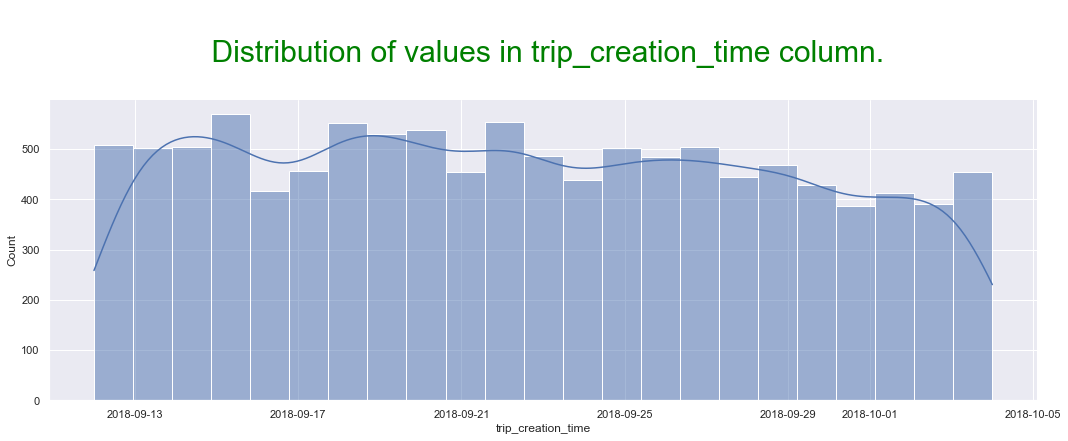

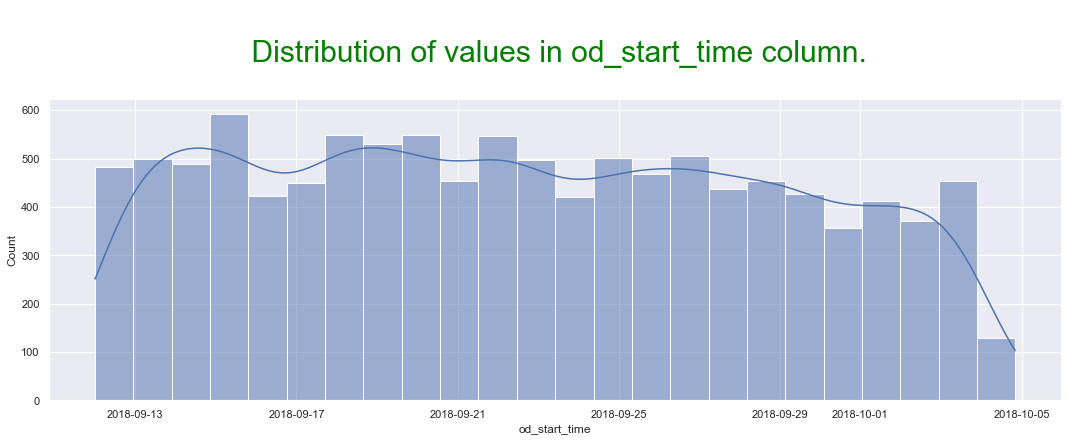

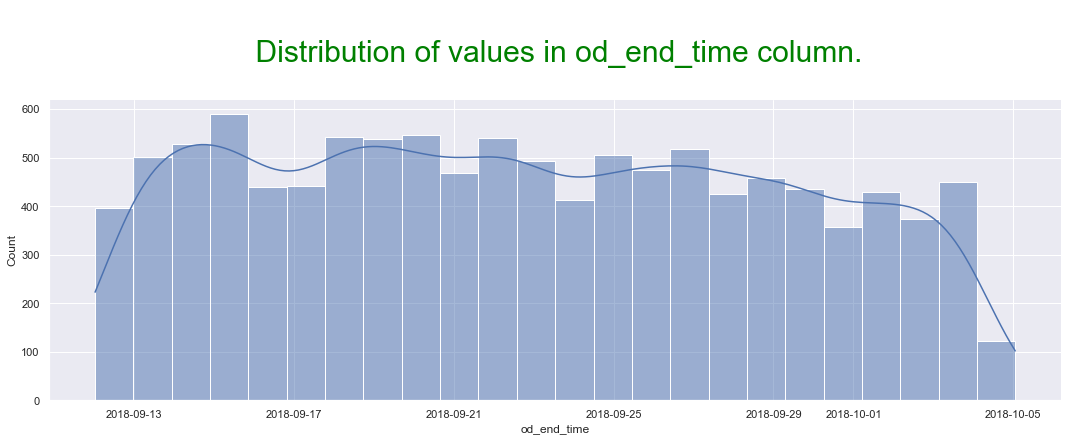

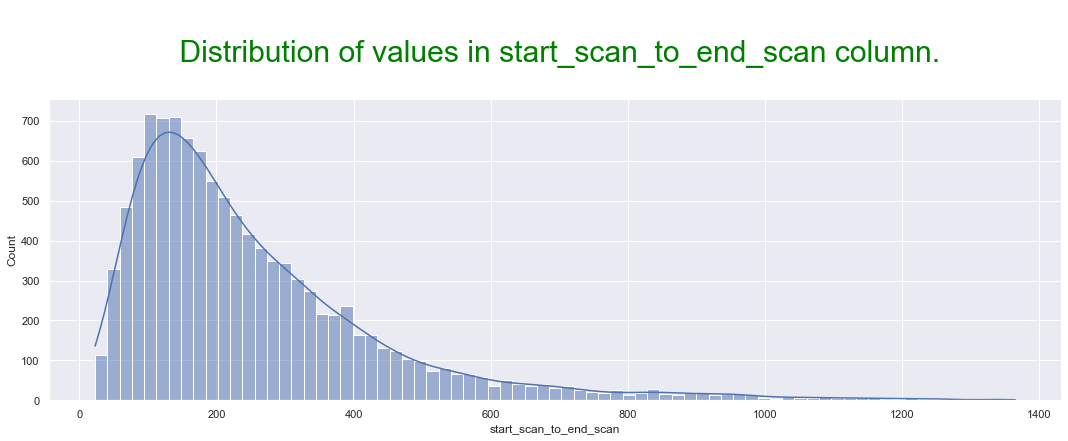

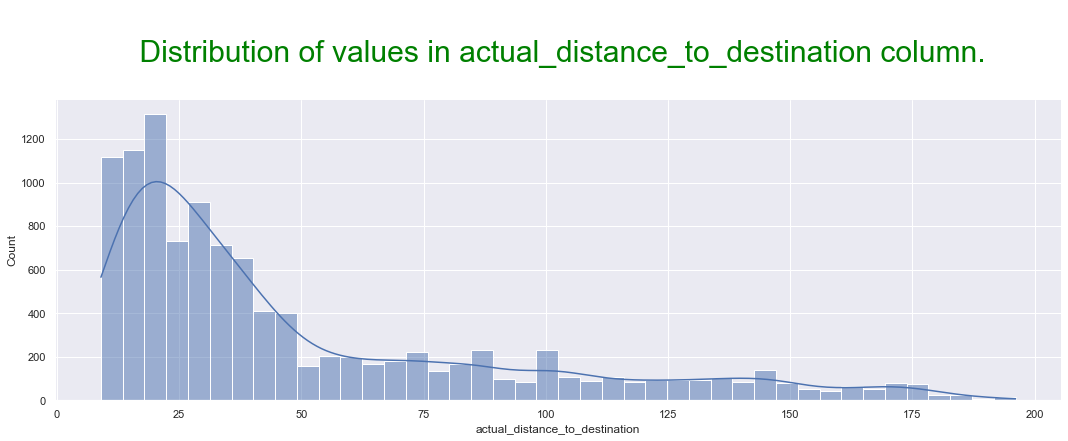

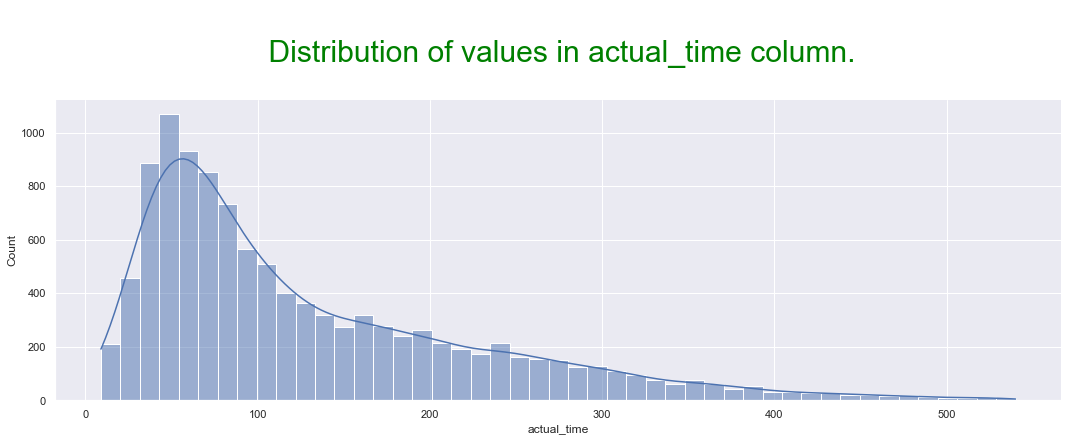

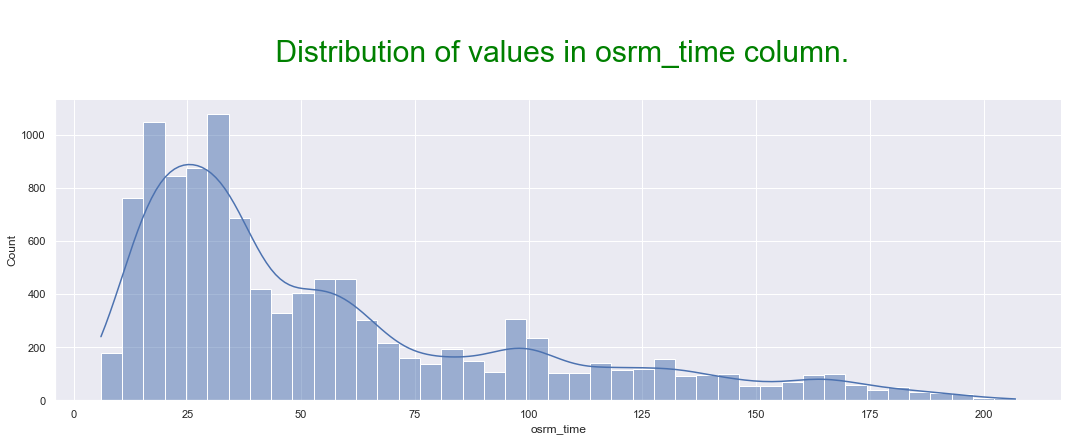

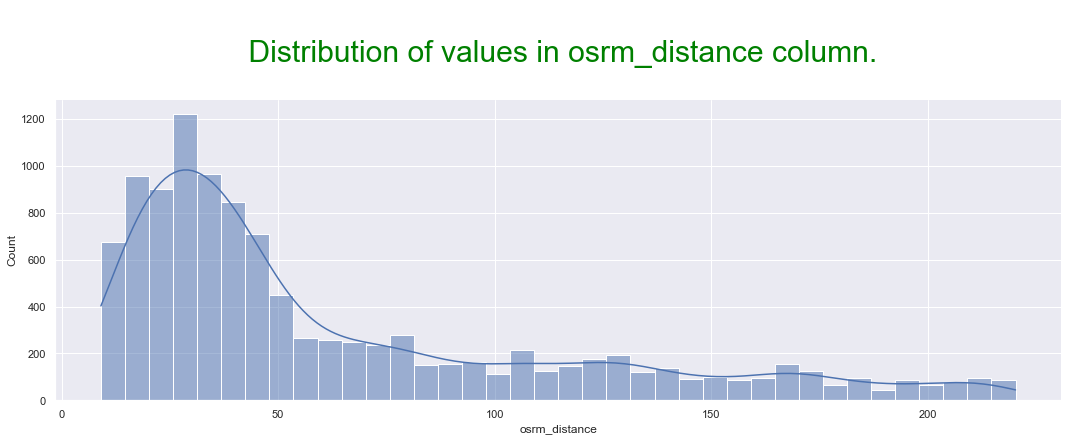

In [17]:
for column in get_columns_by_types(df, continuous_types):
    sns.displot(df[column], kde=True, height=5, aspect=3)
    plt.title(f"\n Distribution of values in {column} column.\n", fontsize=30, color="green")
    plt.show()

***
***
## **6. Bivariate Analysis.**

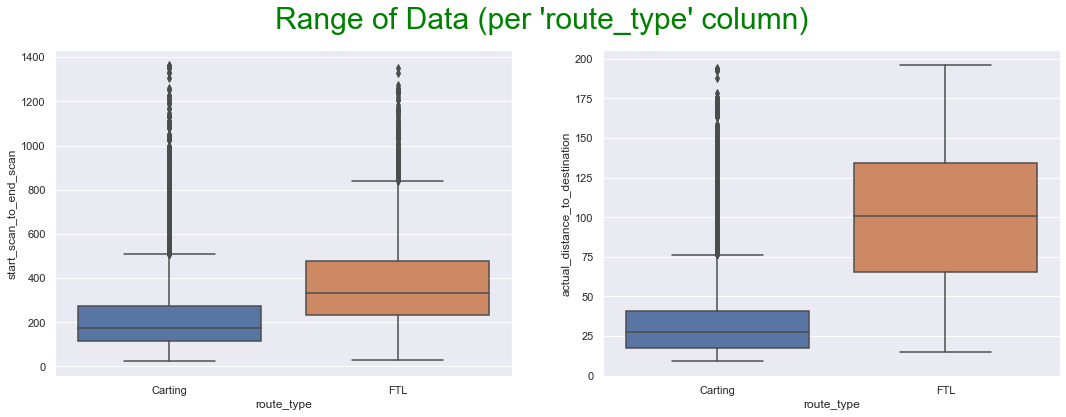

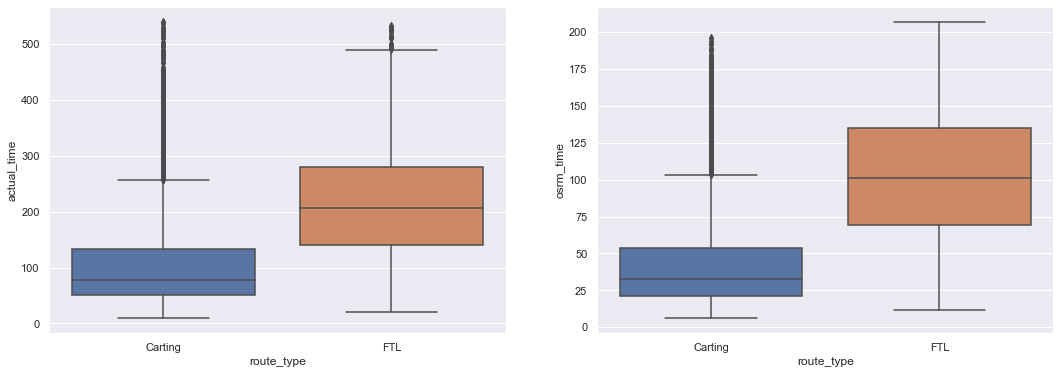

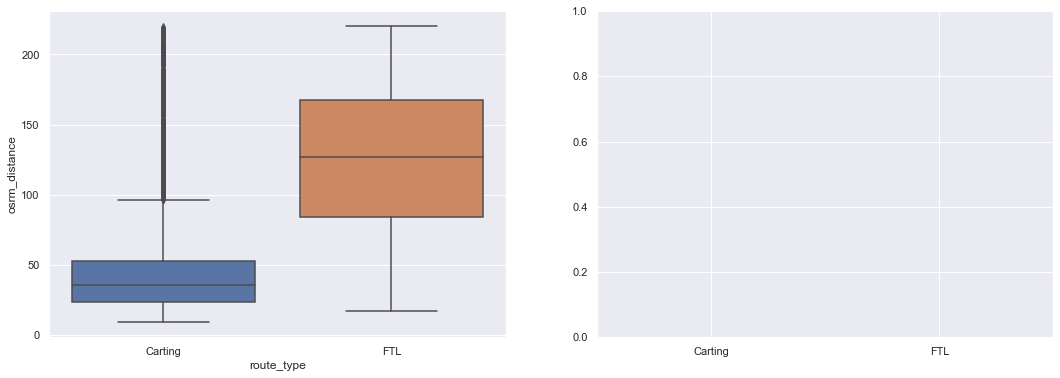

In [18]:
for category in get_columns_by_types(df, categorical_types):
    column_index = 0
    while column_index < len(get_columns_by_types(df, numeric_types)):
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
        if  column_index == 0:
            fig.suptitle(f"Range of Data (per '{category}' column)", fontsize=30, color="green")
        sns.boxplot(data=df, y=get_columns_by_types(df, numeric_types)[column_index], ax=axes[0], x=category)
        column_index += 1
        if column_index < len(get_columns_by_types(df, numeric_types)):
            sns.boxplot(data=df, y=get_columns_by_types(df, numeric_types)[column_index], ax=axes[1], x=category)
            column_index += 1
        plt.show()

***
***
## **7. Analysis of Correlation Between Data.**

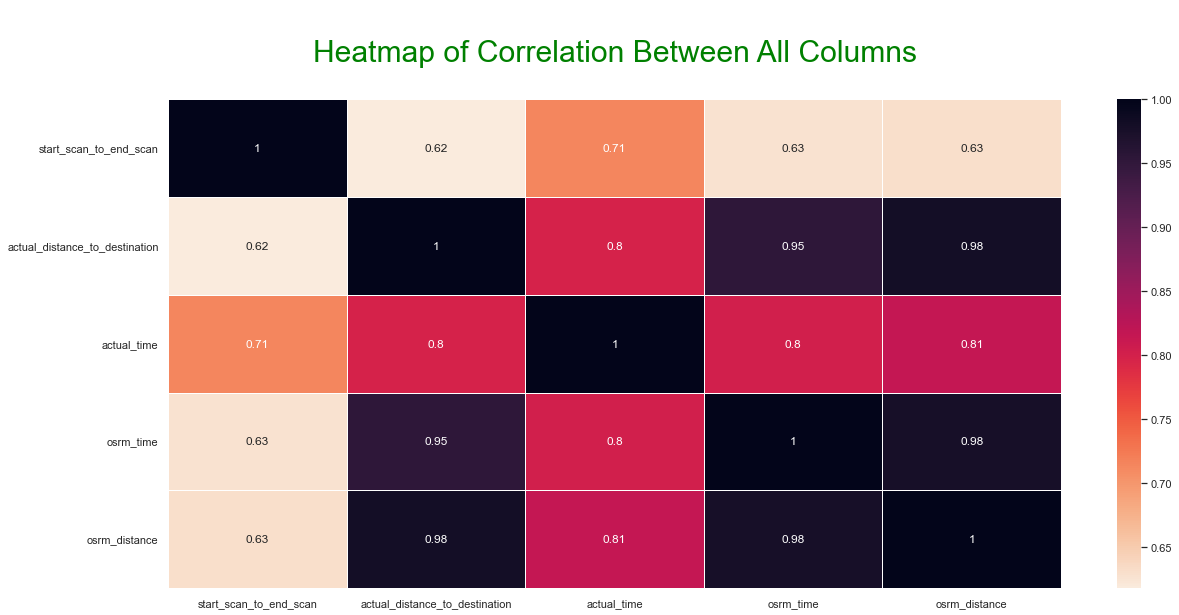

In [19]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=30, color="green")
plt.show()

***
***
## **8. Extracting new features from 'source_name' and 'destination_name' columns.**

***
### A. source_state
### B. source_city
### C. source_place
### D. destination_state
### E. destination_city
### F. destination_place

In [20]:
transformation = {'state': lambda x: str(x).split('(')[1].split(')')[0] if '(' in str(x) else '',
'city': lambda x: str(x).split('_')[0] if '_' in str(x) else str(x).split(' ')[0],
'place': lambda x: str(x).replace(' ('+transformation['state'](str(x))+')', '') if '(' in str(x) else str(x)}
for column in ['source_name', 'destination_name']:
    for new_column in [f"{column.split('_')[0]}_state", f"{column.split('_')[0]}_city", f"{column.split('_')[0]}_place"]:
        df[new_column] = df[column].apply(transformation[new_column.split('_')[1]])
    df.drop([column], inplace=True, axis=1)

In [21]:
df.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place
1,trip-153671042288605164,IND572101AAA,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,Karnataka,Tumkur,Tumkur_Veersagr_I,Karnataka,Chikblapur,Chikblapur_ShntiSgr_D
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,Maharashtra,Mumbai,Mumbai Hub,Maharashtra,Mumbai,Mumbai_MiraRd_IP
4,trip-153671052974046625,IND583201AAA,IND583201AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,Karnataka,Hospet,Hospet,Karnataka,Hospet,Hospet
5,trip-153671055416136166,IND600116AAB,IND602105AAB,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,Tamil Nadu,Chennai,Chennai_Porur_DPC,Tamil Nadu,Chennai,Chennai_Sriperumbudur_Dc
6,trip-153671066201138152,IND600044AAD,IND600048AAA,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,Tamil Nadu,Chennai,Chennai_Chrompet_DPC,Tamil Nadu,Chennai,Chennai_Vandalur_Dc


***
***
## **9. Extracting new features from 'trip_creation_time' column.**

***
### A. trip_creation_year
### B. trip_creation_month
### C. trip_creation_day
### D. trip_creation_hour

In [22]:
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df.drop(['trip_creation_time'], inplace=True, axis=1)

In [23]:
df.head()

,trip_uuid,source_center,destination_center,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour
1,trip-153671042288605164,IND572101AAA,IND562101AAA,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,Karnataka,Tumkur,Tumkur_Veersagr_I,Karnataka,Chikblapur,Chikblapur_ShntiSgr_D,2018,9,12,0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,Maharashtra,Mumbai,Mumbai Hub,Maharashtra,Mumbai,Mumbai_MiraRd_IP,2018,9,12,0
4,trip-153671052974046625,IND583201AAA,IND583201AAA,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,Karnataka,Hospet,Hospet,Karnataka,Hospet,Hospet,2018,9,12,0
5,trip-153671055416136166,IND600116AAB,IND602105AAB,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,Tamil Nadu,Chennai,Chennai_Porur_DPC,Tamil Nadu,Chennai,Chennai_Sriperumbudur_Dc,2018,9,12,0
6,trip-153671066201138152,IND600044AAD,IND600048AAA,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,Tamil Nadu,Chennai,Chennai_Chrompet_DPC,Tamil Nadu,Chennai,Chennai_Vandalur_Dc,2018,9,12,0


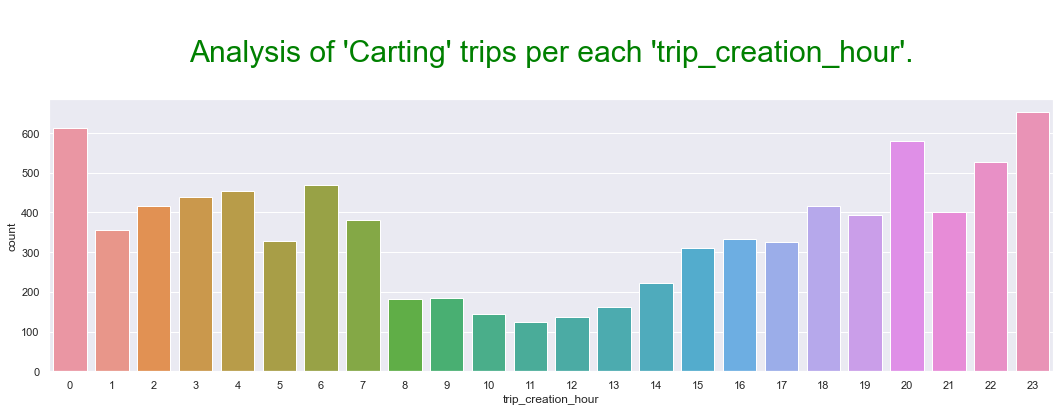

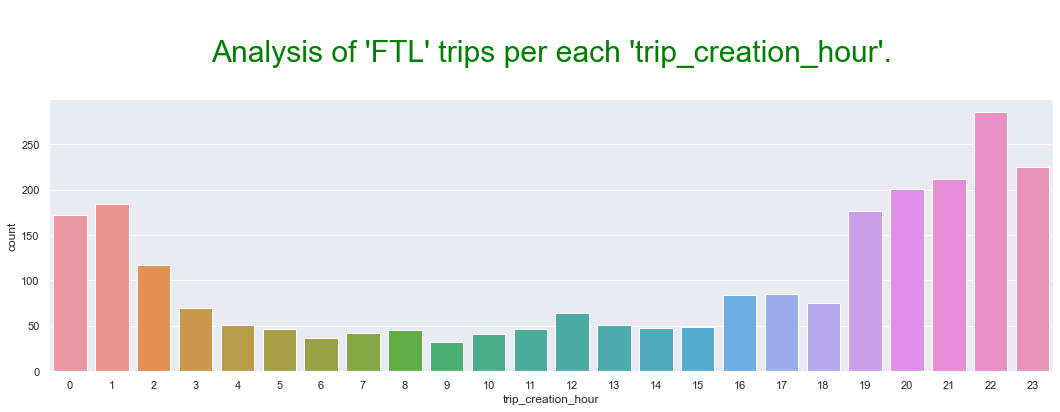

In [24]:
fig, axes = plt.subplots(figsize=(18,5))
sns.countplot(data=df[df['route_type']=='Carting'], x='trip_creation_hour')
plt.title(f"\nAnalysis of 'Carting' trips per each 'trip_creation_hour'.\n", fontsize=30, color="green")
plt.show()
fig, axes = plt.subplots(figsize=(18,5))
sns.countplot(data=df[df['route_type']=='FTL'], x='trip_creation_hour')
plt.title(f"\nAnalysis of 'FTL' trips per each 'trip_creation_hour'.\n", fontsize=30, color="green")
plt.show()

***
***
## **10. Creating a new feature 'od_time_elapsed' from 'od_start_time' and 'od_end_time' columns.**

In [25]:
df['od_time_elapsed'] = (df['od_end_time'] - df['od_start_time']) / pd.Timedelta('1 minute')
df.drop(['od_start_time'], inplace=True, axis=1)
df.drop(['od_end_time'], inplace=True, axis=1)

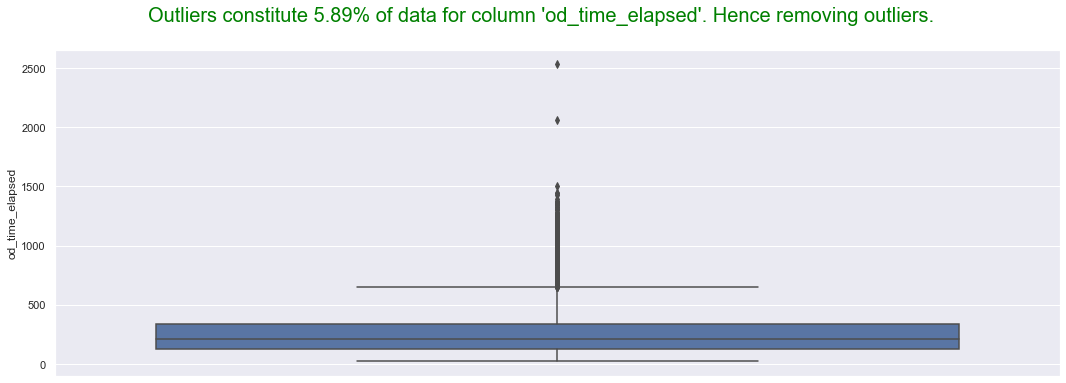

In [26]:
df = remove_outlier(df, 'od_time_elapsed')

In [27]:
df.head()

,trip_uuid,source_center,destination_center,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,od_time_elapsed
1,trip-153671042288605164,IND572101AAA,IND562101AAA,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,180.0,73.186911,143.0,68.0,85.1110,Karnataka,Tumkur,Tumkur_Veersagr_I,Karnataka,Chikblapur,Chikblapur_ShntiSgr_D,2018,9,12,0,181.611874
3,trip-153671046011330457,IND400072AAB,IND401104AAA,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,17.175274,59.0,15.0,19.6800,Maharashtra,Mumbai,Mumbai Hub,Maharashtra,Mumbai,Mumbai_MiraRd_IP,2018,9,12,0,100.494935
5,trip-153671055416136166,IND600116AAB,IND602105AAB,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,189.0,24.597048,61.0,23.0,28.0647,Tamil Nadu,Chennai,Chennai_Porur_DPC,Tamil Nadu,Chennai,Chennai_Sriperumbudur_Dc,2018,9,12,0,190.487849
6,trip-153671066201138152,IND600044AAD,IND600048AAA,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,98.0,9.100510,24.0,13.0,12.0184,Tamil Nadu,Chennai,Chennai_Chrompet_DPC,Tamil Nadu,Chennai,Chennai_Vandalur_Dc,2018,9,12,0,98.005634
7,trip-153671066826362165,IND560064AAD,IND560064AAA,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,146.0,22.424210,64.0,34.0,28.9203,Karnataka,Bengaluru,Bengaluru_Bagaluru_D,Karnataka,Bengaluru,Bengaluru_NwYlhnka_DC,2018,9,12,0,176.448324


***
***
## **11. Performing 'One Hot Encoding' on all Categorical columns.**

In [28]:
for column in get_columns_by_types(df, categorical_types):
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
    df.drop(column, inplace=True, axis=1)

In [29]:
df.head()

,trip_uuid,source_center,destination_center,route_schedule_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,od_time_elapsed,route_type_Carting,route_type_FTL
1,trip-153671042288605164,IND572101AAA,IND562101AAA,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,180.0,73.186911,143.0,68.0,85.1110,Karnataka,Tumkur,Tumkur_Veersagr_I,Karnataka,Chikblapur,Chikblapur_ShntiSgr_D,2018,9,12,0,181.611874,1,0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,100.0,17.175274,59.0,15.0,19.6800,Maharashtra,Mumbai,Mumbai Hub,Maharashtra,Mumbai,Mumbai_MiraRd_IP,2018,9,12,0,100.494935,1,0
5,trip-153671055416136166,IND600116AAB,IND602105AAB,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,189.0,24.597048,61.0,23.0,28.0647,Tamil Nadu,Chennai,Chennai_Porur_DPC,Tamil Nadu,Chennai,Chennai_Sriperumbudur_Dc,2018,9,12,0,190.487849,1,0
6,trip-153671066201138152,IND600044AAD,IND600048AAA,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,98.0,9.100510,24.0,13.0,12.0184,Tamil Nadu,Chennai,Chennai_Chrompet_DPC,Tamil Nadu,Chennai,Chennai_Vandalur_Dc,2018,9,12,0,98.005634,1,0
7,trip-153671066826362165,IND560064AAD,IND560064AAA,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,146.0,22.424210,64.0,34.0,28.9203,Karnataka,Bengaluru,Bengaluru_Bagaluru_D,Karnataka,Bengaluru,Bengaluru_NwYlhnka_DC,2018,9,12,0,176.448324,1,0


***
***
## **12. Applying 'Min-Max Scaler' on all Numerical columns.**

In [30]:
for column in get_columns_by_types(df, numeric_types):
    df[[column]] = minmaxscaler.fit_transform(df[[column]])

In [31]:
df.head()

,trip_uuid,source_center,destination_center,route_schedule_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,od_time_elapsed,route_type_Carting,route_type_FTL
1,trip-153671042288605164,IND572101AAA,IND562101AAA,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0.250799,0.343053,0.252354,0.305,0.360122,Karnataka,Tumkur,Tumkur_Veersagr_I,Karnataka,Chikblapur,Chikblapur_ShntiSgr_D,0.0,0.0,0.37931,0.0,0.252305,1,0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0.123003,0.043682,0.094162,0.040,0.050236,Maharashtra,Mumbai,Mumbai Hub,Maharashtra,Mumbai,Mumbai_MiraRd_IP,0.0,0.0,0.37931,0.0,0.122895,1,0
5,trip-153671055416136166,IND600116AAB,IND602105AAB,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,0.265176,0.083350,0.097928,0.080,0.089947,Tamil Nadu,Chennai,Chennai_Porur_DPC,Tamil Nadu,Chennai,Chennai_Sriperumbudur_Dc,0.0,0.0,0.37931,0.0,0.266465,1,0
6,trip-153671066201138152,IND600044AAD,IND600048AAA,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,0.119808,0.000524,0.028249,0.030,0.013950,Tamil Nadu,Chennai,Chennai_Chrompet_DPC,Tamil Nadu,Chennai,Chennai_Vandalur_Dc,0.0,0.0,0.37931,0.0,0.118924,1,0
7,trip-153671066826362165,IND560064AAD,IND560064AAA,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,0.196486,0.071736,0.103578,0.135,0.093999,Karnataka,Bengaluru,Bengaluru_Bagaluru_D,Karnataka,Bengaluru,Bengaluru_NwYlhnka_DC,0.0,0.0,0.37931,0.0,0.244067,1,0


In [32]:
right_skew_transformations = [['natural log', lambda x: np.log(x)],
                  ['log base 10', lambda x: np.log10(x)],
                 ['log base 2', lambda x: np.log2(x)],
                 ['square root', lambda x: (x)**(1/2)],
                 ['cube root', lambda x: (x)**(1/3)]]
left_skew_transformations = [['exponential', lambda x: np.exp(x)],
                 ['square', lambda x: (x)**(2)],
                 ['cube', lambda x: (x)**(3)]]

***
***
## **13. Comparison of 'start_scan_to_end_scan' and 'od_time_elapsed' columns using Hypothesis Testing.**

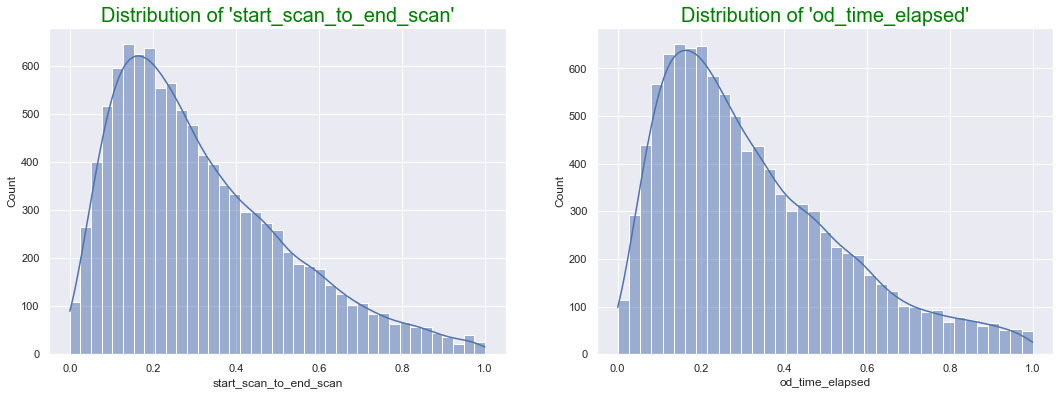

In [33]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(df['start_scan_to_end_scan'], kde=True, ax=axes[0]).set_title("Distribution of 'start_scan_to_end_scan'", fontsize=20, color="green")
sns.histplot(df['od_time_elapsed'], kde=True, ax=axes[1]).set_title("Distribution of 'od_time_elapsed'", fontsize=20, color="green")
plt.show()

***
### Distributions are right skewed. Hence, trying different transformations to make them roughly Guassian.

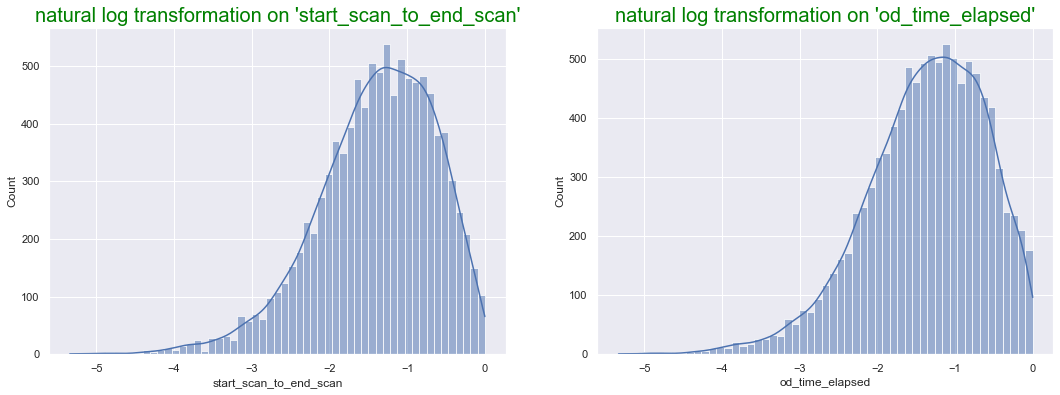

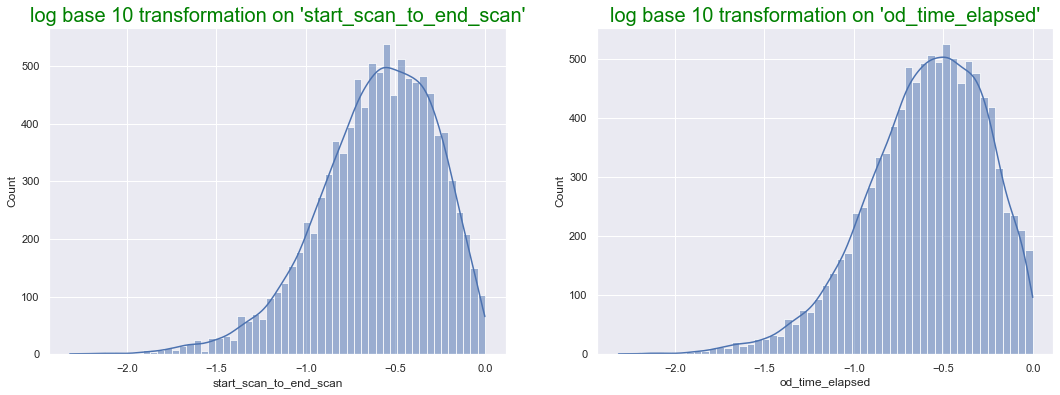

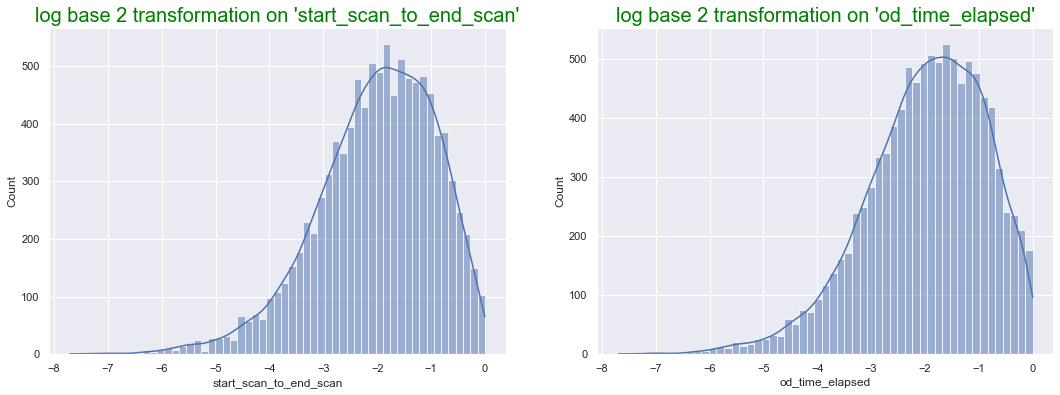

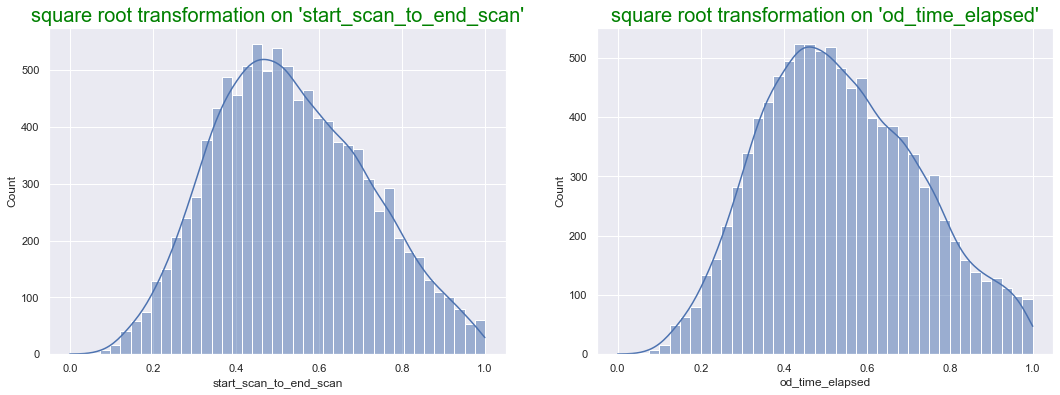

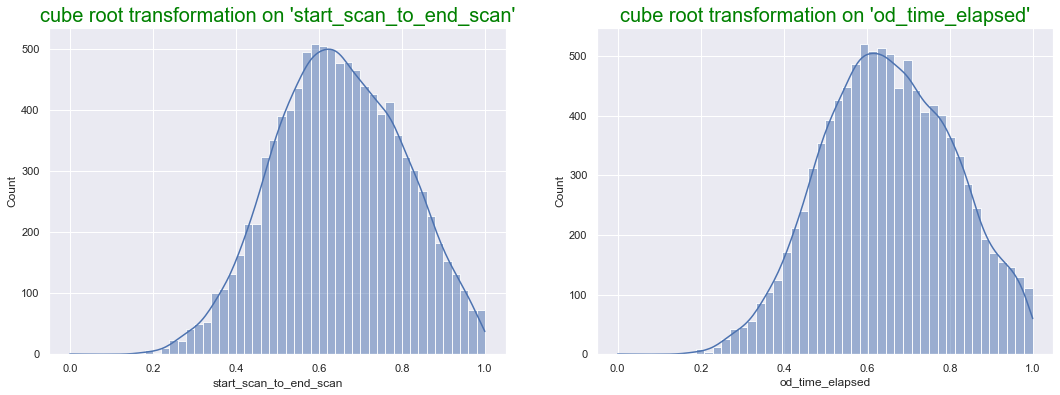

In [34]:
for transformation in right_skew_transformations:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
    f1 = sns.histplot(df['start_scan_to_end_scan'].apply(transformation[1]), kde=True, ax=axes[0])
    f1.set_title(f"{transformation[0]} transformation on 'start_scan_to_end_scan'", fontsize=20, color="green")
    f2 = sns.histplot(df['od_time_elapsed'].apply(transformation[1]), kde=True, ax=axes[1])
    f2.set_title(f"{transformation[0]} transformation on 'od_time_elapsed'", fontsize=20, color="green")
    plt.show()

***
### Applying square root transformation as it looks more closer to Guassian.

In [35]:
df['start_scan_to_end_scan'] = df['start_scan_to_end_scan'].apply(lambda x: (x)**(1/2))
df['od_time_elapsed'] = df['od_time_elapsed'].apply(lambda x: (x)**(1/2))

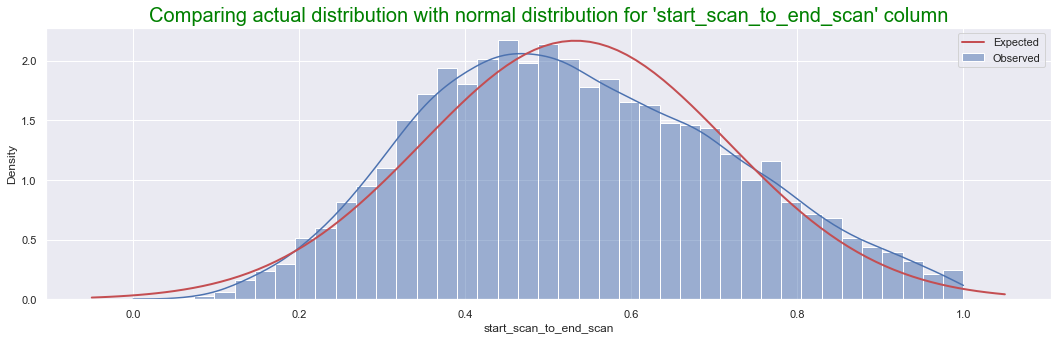

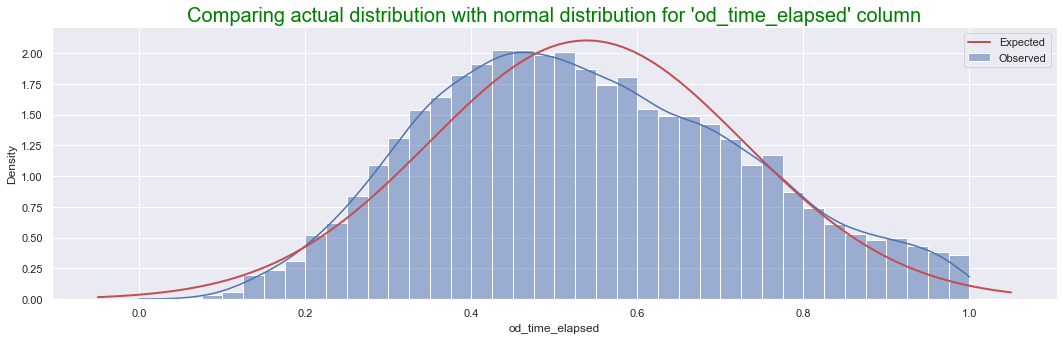

In [36]:
for column in ['start_scan_to_end_scan', 'od_time_elapsed']:
    plt.subplots(figsize=(18,5))
    data = df[column]
    ax = sns.histplot(data, kde=True, stat='density', label='Observed')
    x_pdf = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    y_pdf = stats.norm.pdf(x_pdf, loc=data.mean(), scale=data.std())
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Expected')                                                   
    ax.legend()
    ax.set_title(f"Comparing actual distribution with normal distribution for '{column}' column", fontsize=20, color="green")
    plt.show()

***
### Comparing variance of 'start_scan_to_end_scan' and 'od_time_elapsed' columns.

In [37]:
np.std(df['start_scan_to_end_scan'])**2, np.std(df['od_time_elapsed'])**2

(0.033922239133307275, 0.036001493593160995)

In [38]:
sample_data = df.sample(100)

***
### **Applying Unpaired T-Test**
***
### **H0** = The mean difference between paired observations for 'start_scan_to_end_scan' and 'od_time_elapsed' columns is zero.
### **H1** = The mean difference between paired observations for 'start_scan_to_end_scan' and 'od_time_elapsed' columns is not zero.

### **Significance Level (α/2)** = 0.025

In [39]:
stats.ttest_ind(sample_data['start_scan_to_end_scan'], df['od_time_elapsed'])

Ttest_indResult(statistic=0.15554443045198654, pvalue=0.8763951362986699)

In [40]:
stats.ks_2samp(sample_data['start_scan_to_end_scan'], df['od_time_elapsed'])

KstestResult(statistic=0.0410866202629544, pvalue=0.9938129370096981)

***
### Failed to reject null hypothesis as the p-value is higher than significance level.

***
***
## **14. Comparison of 'actual_time' and 'osrm_time' columns using Hypothesis Testing.**

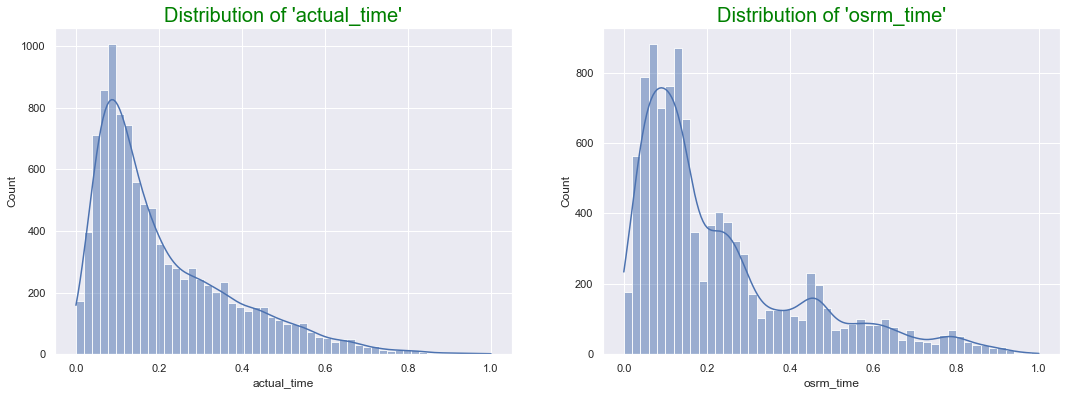

In [41]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(df['actual_time'], kde=True, ax=axes[0]).set_title("Distribution of 'actual_time'", fontsize=20, color="green")
sns.histplot(df['osrm_time'], kde=True, ax=axes[1]).set_title("Distribution of 'osrm_time'", fontsize=20, color="green")
plt.show()

***
### Distributions are right skewed. Hence, trying different transformations to make them roughly Guassian.

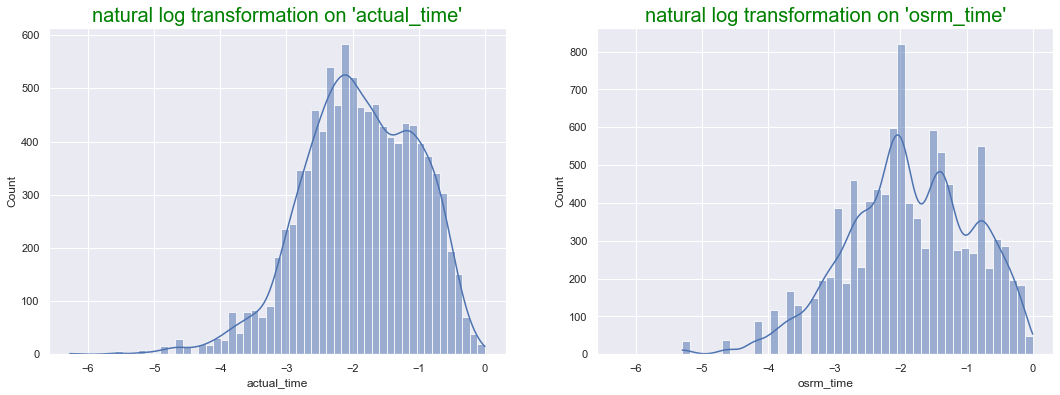

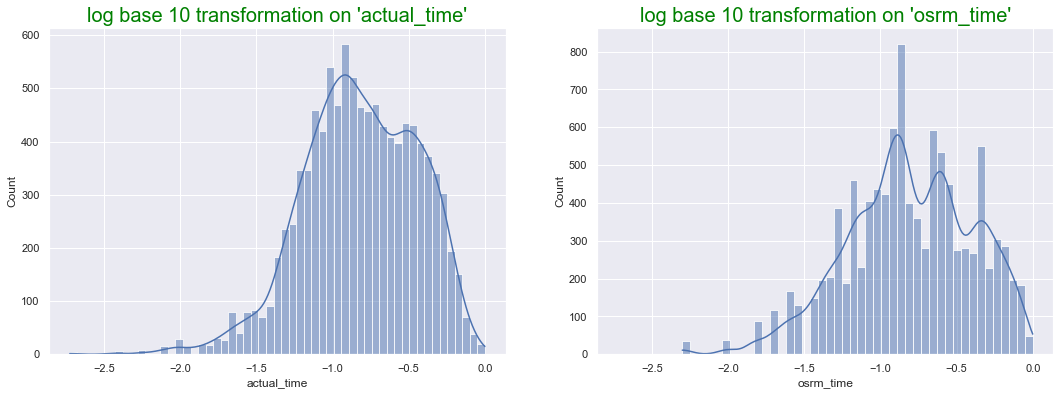

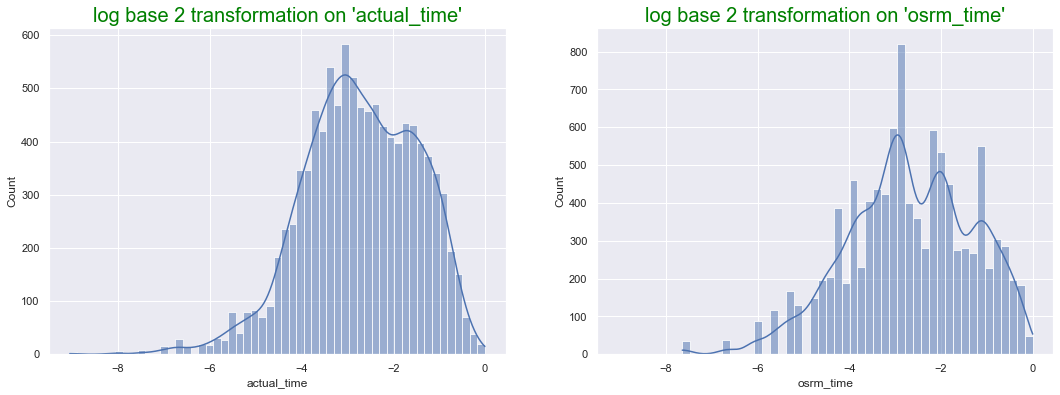

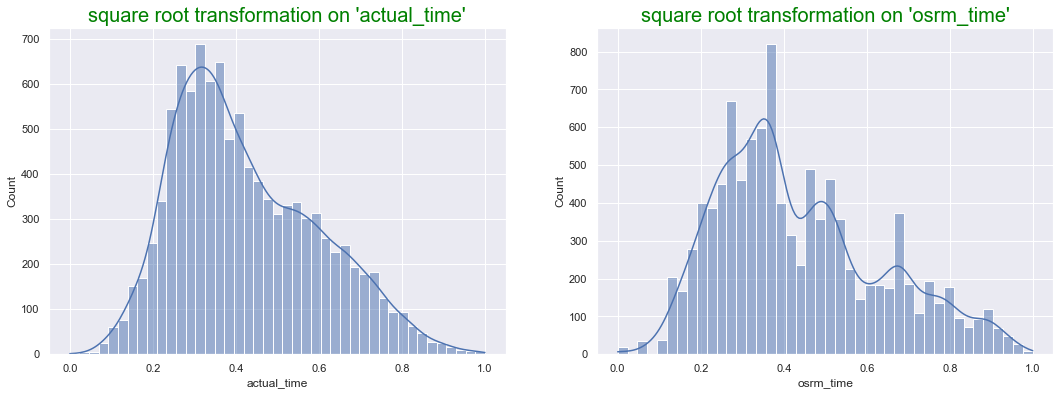

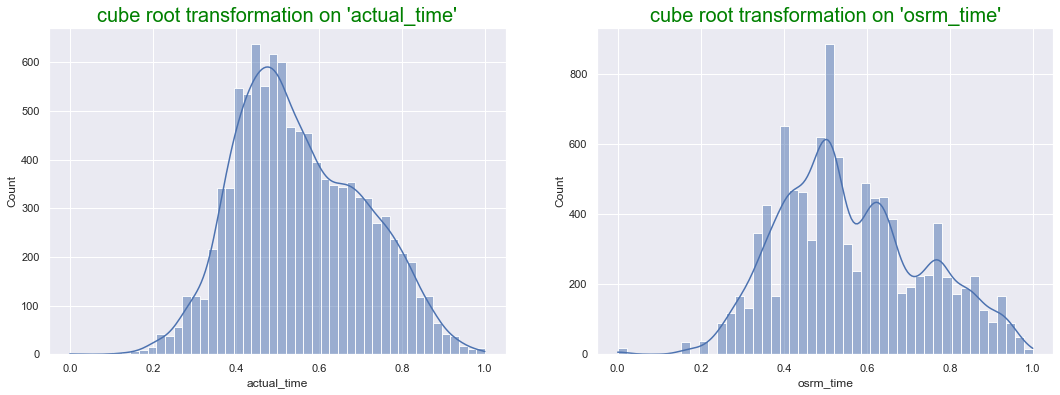

In [42]:
for transformation in right_skew_transformations:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
    f1 = sns.histplot(df['actual_time'].apply(transformation[1]), kde=True, ax=axes[0])
    f1.set_title(f"{transformation[0]} transformation on 'actual_time'", fontsize=20, color="green")
    f2 = sns.histplot(df['osrm_time'].apply(transformation[1]), kde=True, ax=axes[1])
    f2.set_title(f"{transformation[0]} transformation on 'osrm_time'", fontsize=20, color="green")
    plt.show()

***
### Applying cube root transformation as it looks more closer to Guassian.

In [43]:
df['actual_time'] = df['actual_time'].apply(lambda x: (x)**(1/3))
df['osrm_time'] = df['osrm_time'].apply(lambda x: (x)**(1/3))

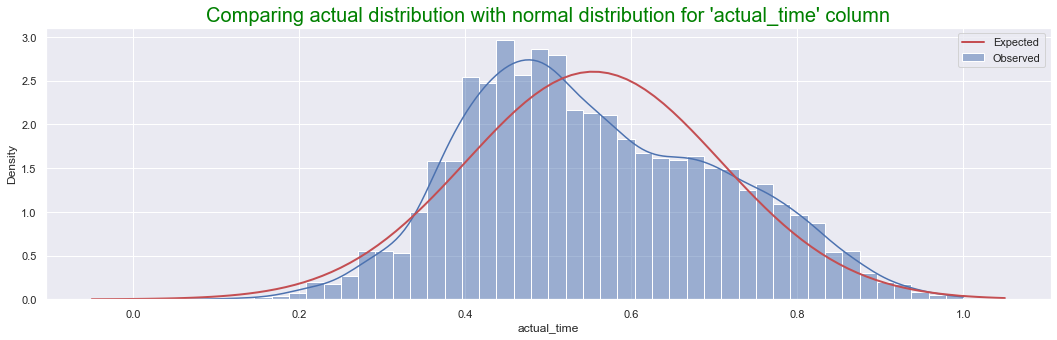

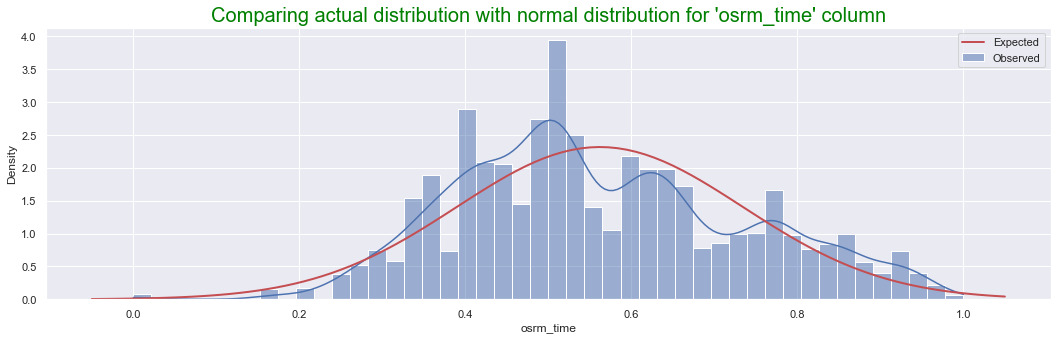

In [44]:
for column in ['actual_time', 'osrm_time']:
    plt.subplots(figsize=(18,5))
    data = df[column]
    ax = sns.histplot(data, kde=True, stat='density', label='Observed')
    x_pdf = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    y_pdf = stats.norm.pdf(x_pdf, loc=data.mean(), scale=data.std())
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Expected')                                                   
    ax.legend()
    ax.set_title(f"Comparing actual distribution with normal distribution for '{column}' column", fontsize=20, color="green")
    plt.show()

***
### Comparing variance of 'actual_time' and 'osrm_time' columns.

In [45]:
np.std(df['actual_time'])**2, np.std(df['osrm_time'])**2

(0.023475135001964118, 0.029691694413663917)

In [46]:
sample_data = df.sample(100)

***
### **Applying Unpaired T-Test**
***
### **H0** = The mean difference between paired observations for 'actual_time' and 'osrm_time' columns is zero.
### **H1** = The mean difference between paired observations for 'actual_time' and 'osrm_time' columns is not zero.

### **Significance Level (α/2)** = 0.025

In [47]:
stats.ttest_ind(sample_data['actual_time'], df['osrm_time'])

Ttest_indResult(statistic=-1.1811813209706756, pvalue=0.23755760171497195)

In [48]:
stats.ks_2samp(sample_data['actual_time'], df['osrm_time'])

KstestResult(statistic=0.09800850734725441, pvalue=0.2789733646813407)

***
### Failed to reject null hypothesis as the p-value is higher than significance level.

***
***
## **15. Comparison of 'actual_distance_to_destination' and 'osrm_distance' columns using Hypothesis Testing.**

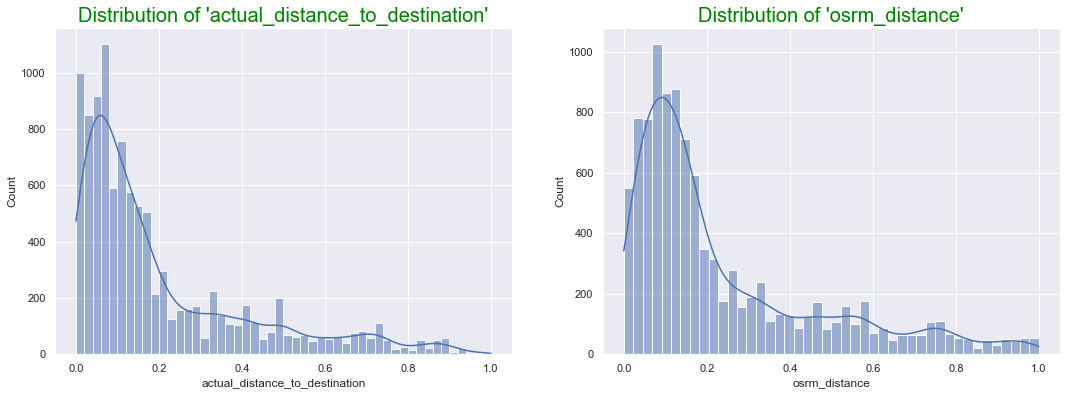

In [49]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
sns.histplot(df['actual_distance_to_destination'], kde=True, ax=axes[0]).set_title("Distribution of 'actual_distance_to_destination'", fontsize=20, color="green")
sns.histplot(df['osrm_distance'], kde=True, ax=axes[1]).set_title("Distribution of 'osrm_distance'", fontsize=20, color="green")
plt.show()

***
### Distributions are right skewed. Hence, trying different transformations to make them roughly Guassian.

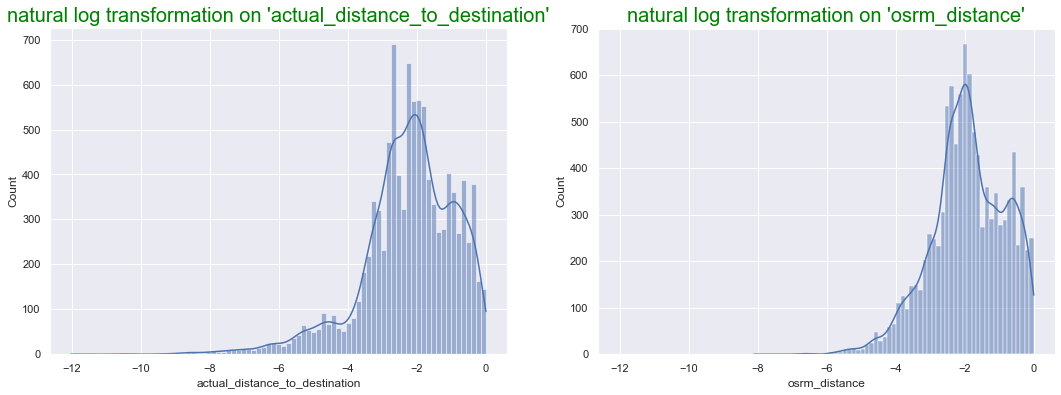

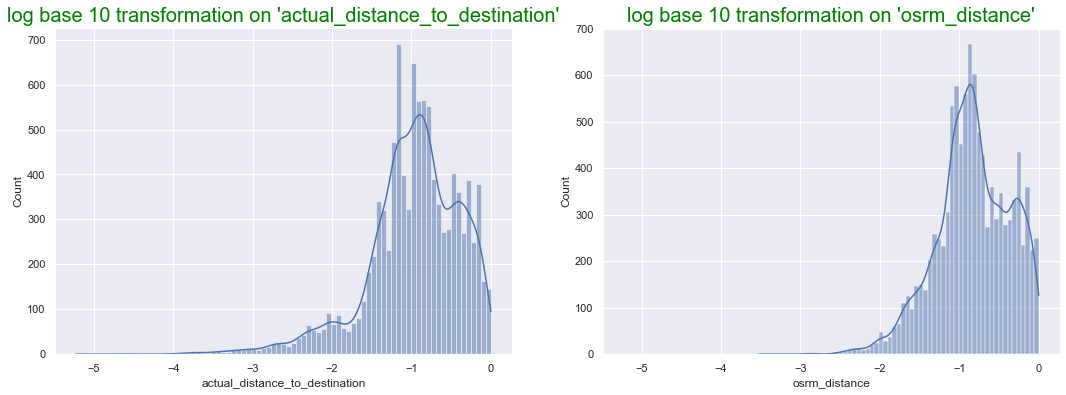

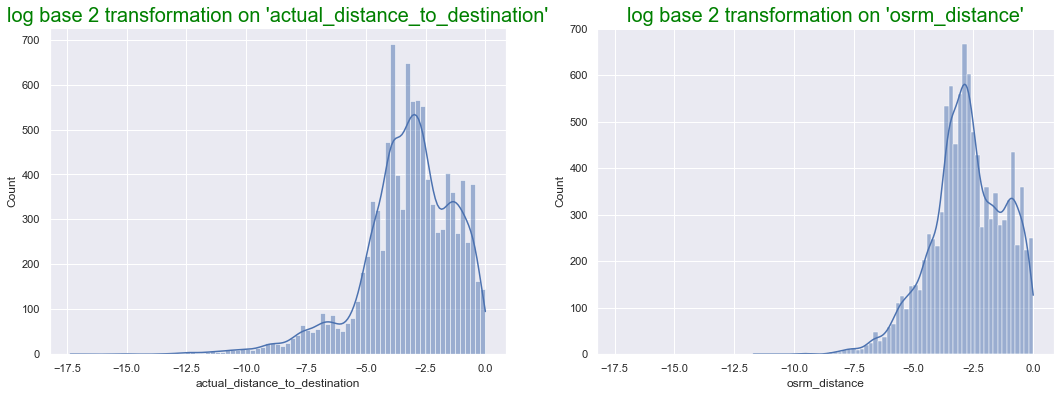

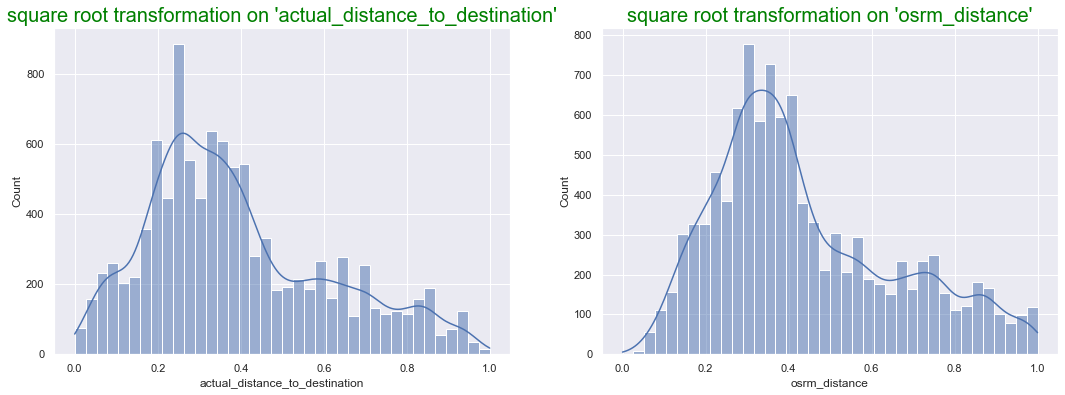

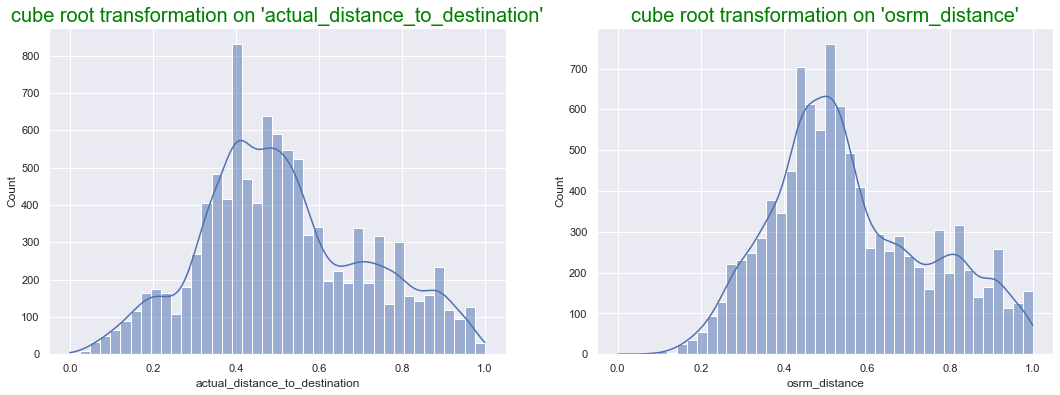

In [50]:
for transformation in right_skew_transformations:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
    f1 = sns.histplot(df['actual_distance_to_destination'].apply(transformation[1]), kde=True, ax=axes[0])
    f1.set_title(f"{transformation[0]} transformation on 'actual_distance_to_destination'", fontsize=20, color="green")
    f2 = sns.histplot(df['osrm_distance'].apply(transformation[1]), kde=True, ax=axes[1])
    f2.set_title(f"{transformation[0]} transformation on 'osrm_distance'", fontsize=20, color="green")
    plt.show()

***
### Applying cube root transformation as it looks more closer to Guassian.

In [51]:
df['actual_distance_to_destination'] = df['actual_distance_to_destination'].apply(lambda x: (x)**(1/3))
df['osrm_distance'] = df['osrm_distance'].apply(lambda x: (x)**(1/3))

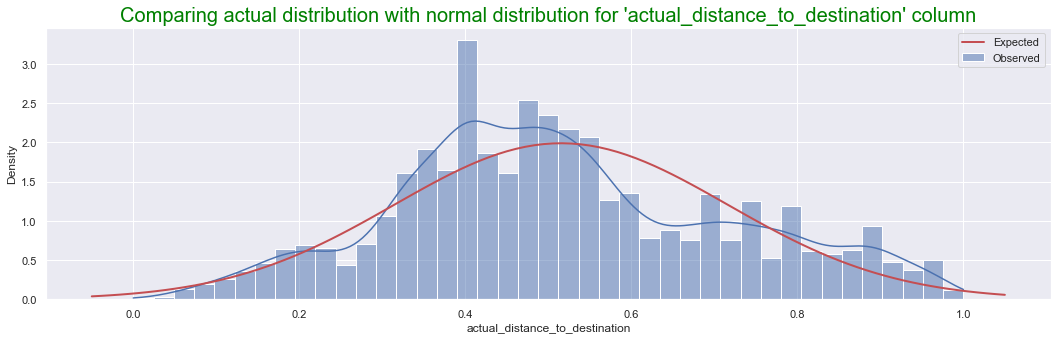

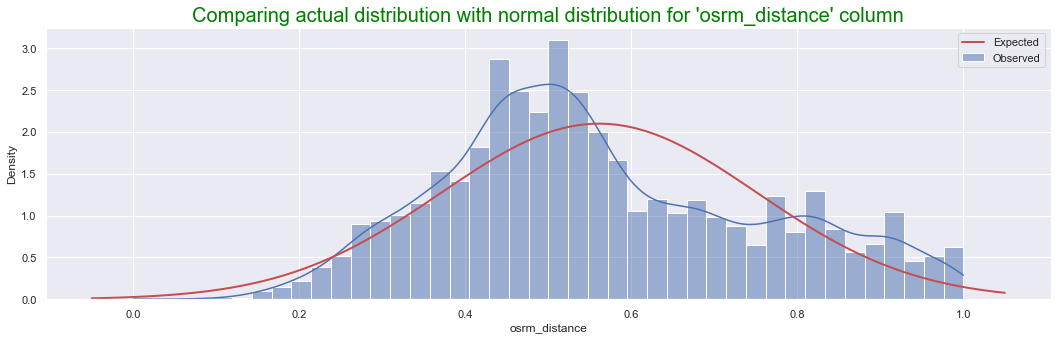

In [52]:
for column in ['actual_distance_to_destination', 'osrm_distance']:
    plt.subplots(figsize=(18,5))
    data = df[column]
    ax = sns.histplot(data, kde=True, stat='density', label='Observed')
    x_pdf = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    y_pdf = stats.norm.pdf(x_pdf, loc=data.mean(), scale=data.std())
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Expected')                                                   
    ax.legend()
    ax.set_title(f"Comparing actual distribution with normal distribution for '{column}' column", fontsize=20, color="green")
    plt.show()

***
### Comparing variance of 'actual_distance_to_destination' and 'osrm_distance' columns.

In [53]:
np.std(df['actual_distance_to_destination'])**2, np.std(df['osrm_distance'])**2

(0.04026167171403123, 0.036189205746761155)

In [54]:
sample_data = df.sample(100)

***
### **Applying Unpaired T-Test**
***
### **H0** = The mean difference between paired observations for 'actual_distance_to_destination' and 'osrm_distance' columns is zero.
### **H1** = The mean difference between paired observations for 'actual_distance_to_destination' and 'osrm_distance' columns is not zero.

### **Significance Level (α/2)** = 0.025

In [55]:
stats.ttest_ind(sample_data['actual_distance_to_destination'], df['osrm_distance'])

Ttest_indResult(statistic=-3.1357582898835217, pvalue=0.0017188610152344094)

In [56]:
stats.ks_2samp(sample_data['actual_distance_to_destination'], df['osrm_distance'])

KstestResult(statistic=0.14254060324825987, pvalue=0.03224027534535956)

***
### Failed to reject null hypothesis as the p-value is higher than significance level.

***
***
## **16. Business Insights.**
#### **A.** The number of Carting trips are 3x more than FTL trips.
#### **B.** The trips are created almost in same numbers everyday.
#### **C.** FTL trips have higher 'start scan to end scan' time compared to Carting trips.
#### **D.** FTL trips have higher 'actual distance to destination' compared to Carting trips.
#### **E.** FTL trips have higher 'actual time' compared to Carting trips.
#### **F.** FTL trips have higher 'osrm time' compared to Carting trips.
#### **G.** FTL trips have higher 'osrm distance' compared to Carting trips.
#### **H.** 'Actual distance to destination' have higher correlation with 'osrm time' and 'osrm distance'.
#### **I.** 'osrm time' have higher correlation with 'Actual distance to destination' and 'osrm distance'.
#### **J.** 'osrm distance' have higher correlation with 'Actual distance to destination' and 'osrm time'.
#### **K.** Most of the trips ('FTL' as well as 'Carting') start between evening and early mornings.
#### **L.** 'od_time_elapsed' is a good estimation of 'start_scan_to_end_scan'.
#### **M.** 'osrm_time' is a good estimation of 'actual_time'.
#### **N.** 'osrm_distance' is a good estimation of 'actual_distance_to_destination'.

***
***
## **17. Recommendations.**
#### **A.** For longer trips (both in terms of time and distance) FTL trips should be preferred.
#### **B.** More trips should start between evening and early mornings.
#### **C.** 'osrm distance' should be used as estimations of the actual trip distances.
#### **D.** 'osrm time' should be used as estimations of the actual trip times.
#### **E.** 'od_time_elapsed' should be used as estimations of start_scan_to_end_scan.